In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [53]:
flows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

flows = flows.dropna(subset=['Value'])
flows_cleaned = flows.dropna(subset=['Value'])

# dropping columns that we don't need
flows_cleaned = flows.drop(columns=['Flag Codes', 'Flags'])


In [54]:
inflows_cleaned = flows_cleaned[flows_cleaned['Variable'] == 'Inflows of foreign population by nationality']
inflows_cleaned = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

In [55]:
inflows_cleaned.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


# K-Means

In [56]:
df = inflows_cleaned[['Country of birth/nationality', 'Year', 'Value']]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Standardize the features
scaler = StandardScaler()
df['Value'] = scaler.fit_transform(df[['Value']])

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Define range of k values to try
k_range = range(2, 11)

# Iterate over each value of k
for k in k_range:
    # Fit K-means clustering algorithm
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Value']])
    
    # Calculate inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['Value']], kmeans.labels_))

# Plotting elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method')

# Plotting silhouette analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()


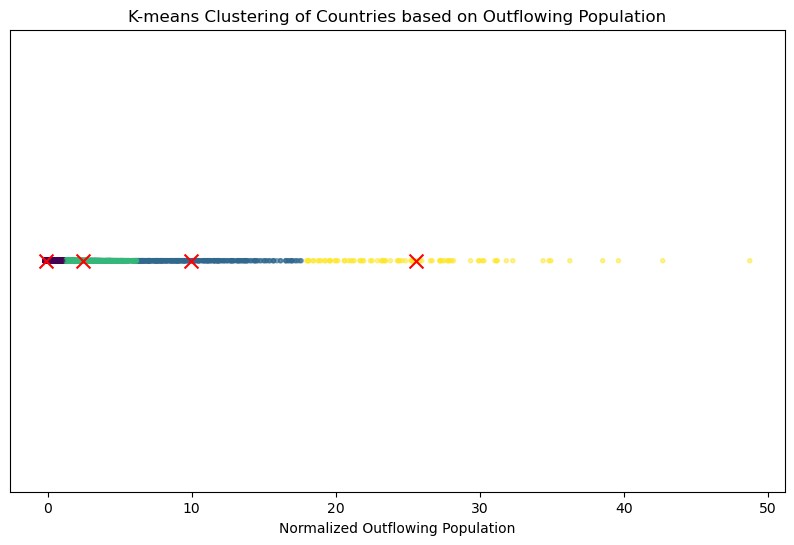

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df.loc[:,'Value'] = scaler.fit_transform(df[['Value']])

# specifying the number of clusters (k)
k = 4

# Fit K-means clustering algorithm
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[['Value']])

# Add cluster labels to the DataFrame
df.loc[: ,'cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df['Value'], [0]*len(df), c=df['cluster_label'], cmap='viridis', alpha=0.5, marker='.')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids, [0]*k, marker='x', s=100, color='red')

plt.title('K-means Clustering of Countries based on Outflowing Population')
plt.xlabel('Normalized Outflowing Population')
plt.yticks([])  # Remove y-axis ticks
plt.show()


In [79]:
df['cluster_label'].unique()

array([0, 2, 1, 3], dtype=int32)

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_83123/2553202943.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_83123/2553202943.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


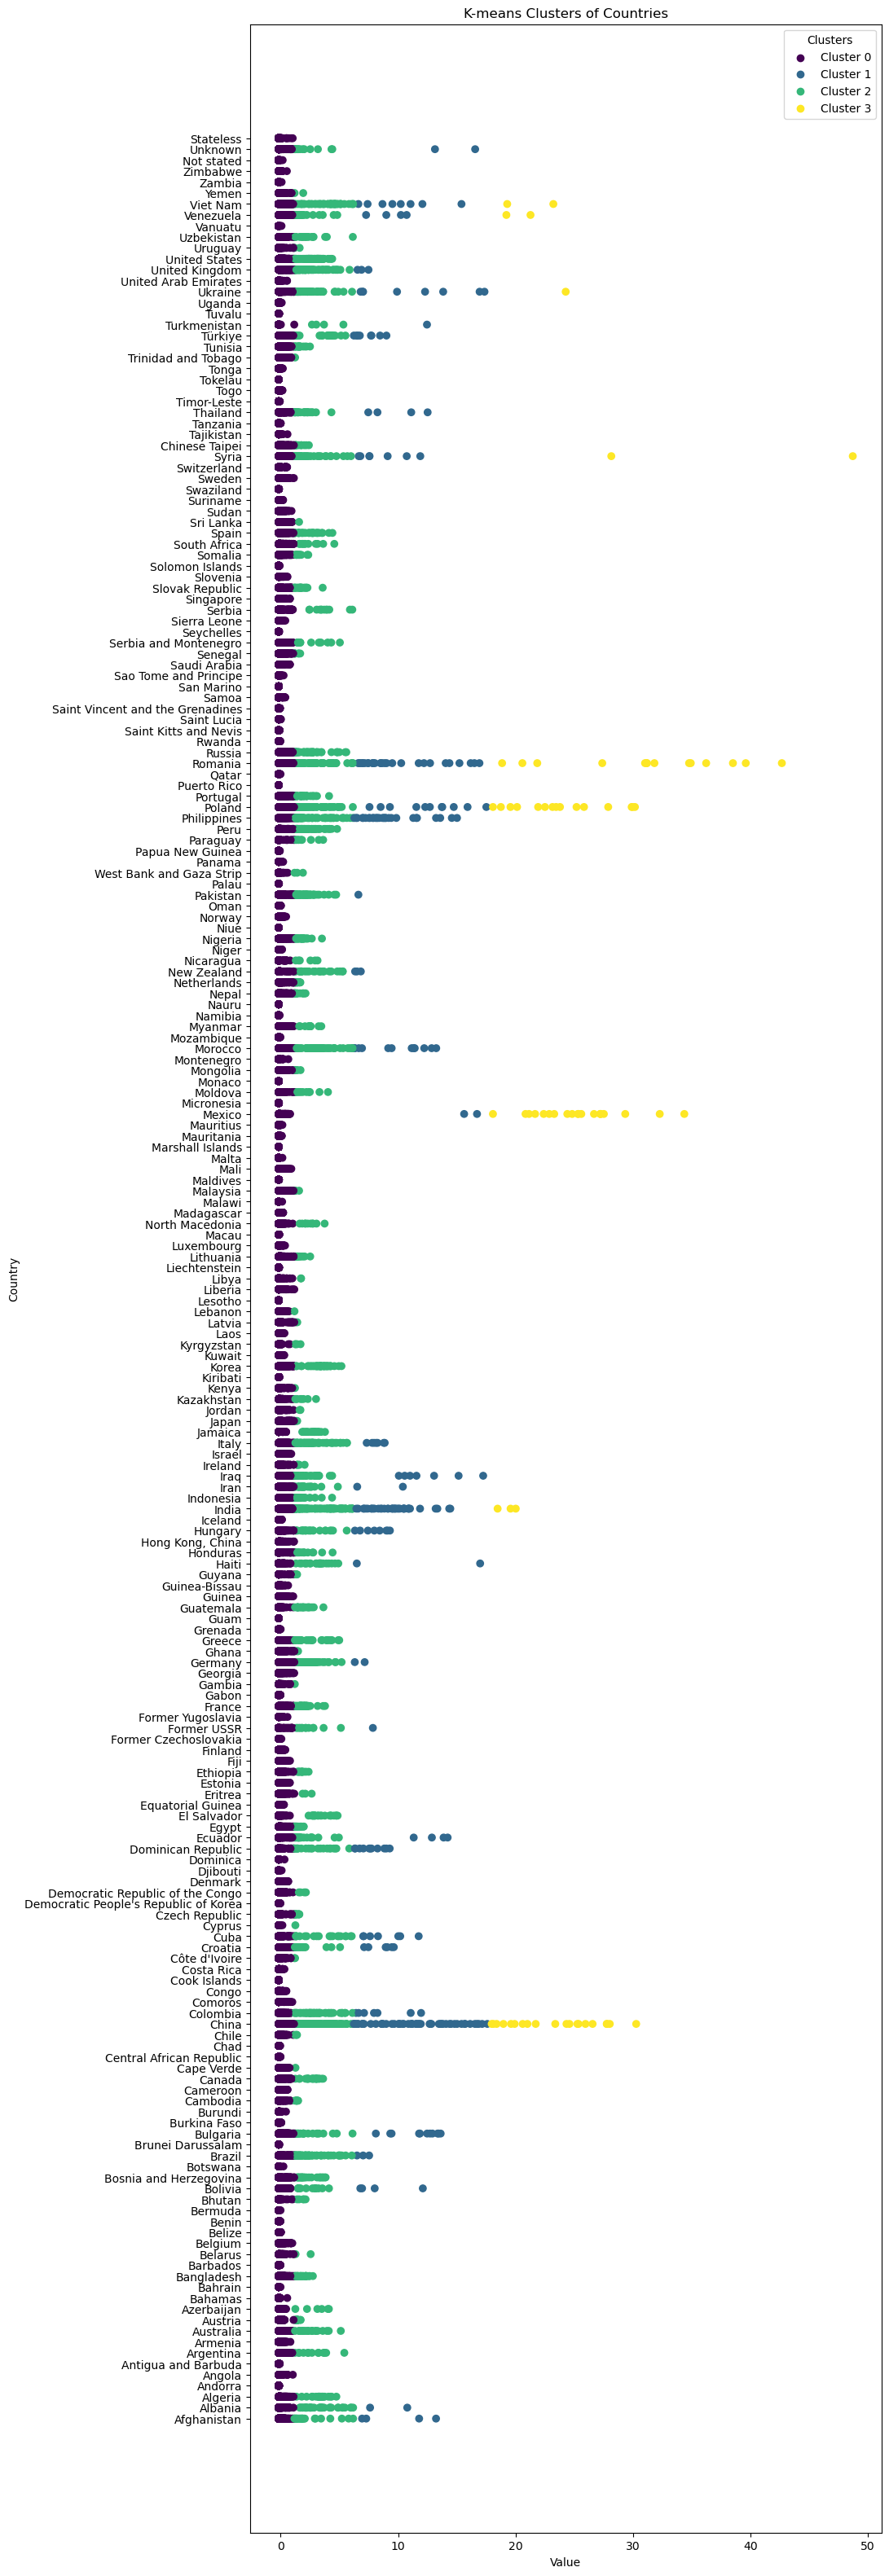

In [86]:

plt.figure(figsize=(10, 40))
scatter = plt.scatter(df['Value'], df['Country of birth/nationality'], c=df['cluster_label'])

unique_labels = np.unique(df['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')

plt.xlabel('Value')
plt.ylabel('Country')
plt.title('K-means Clusters of Countries')

plt.show()


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_83123/3646674789.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_83123/3646674789.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


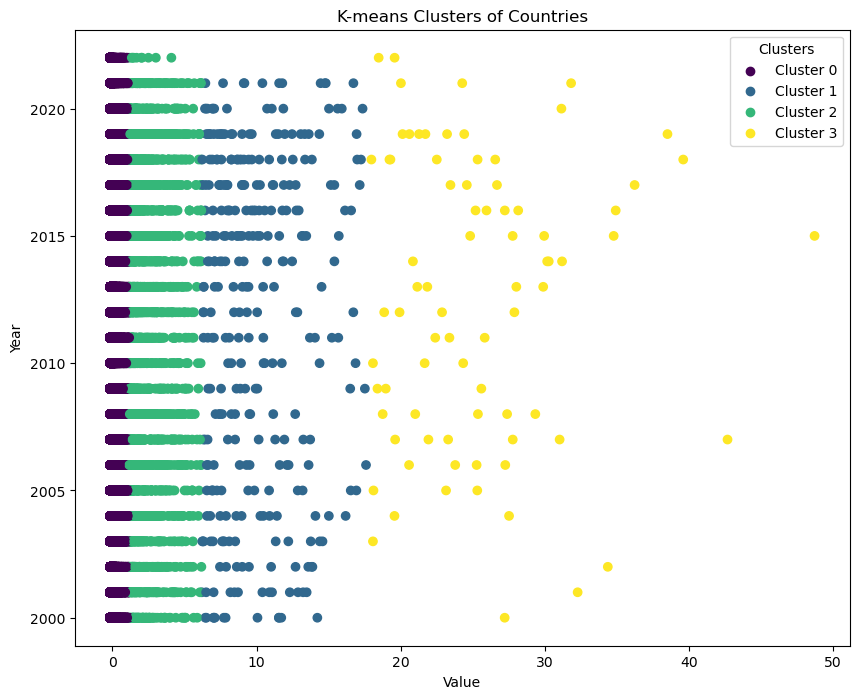

In [87]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Value'], df['Year'], c=df['cluster_label'])

unique_labels = np.unique(df['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')

plt.xlabel('Value')
plt.ylabel('Year')
plt.title('K-means Clusters of Countries')

plt.show()
